## Diamond Price Predicator Using Linear Regression

## About Dataset
This is a dataset that includes 53,940 observations about the characteristics of each unique diamond, as well as the price.

* Carat- Carat weight of the diamond
* Cut - The cut rating of the diamond
* Color - The color rating of the diamond
* Clarity - The clarity rating of the diamond
* Table - The table width of the diamond
* Depth- The percentage of depth of the diamond
* Price - The price (in USD) of the diamond
* X- X dimension of the diamond
* Y- Y dimension of the diamond
* Z- Z dimension of the diamond

## Import Libraries

In [86]:
# for data preprocessing and EDA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# for model building
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

## Load Dataset

In [87]:
df = pd.read_csv('diamonds.csv')

## Inspect Dataset

In [88]:
# first 5 observation
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [89]:
# last 5 observation
df.tail()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74
53939,53940,0.75,Ideal,D,SI2,62.2,55.0,2757,5.83,5.87,3.64


In [90]:
# sample record
df.sample(5)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
8094,8095,0.70,Ideal,F,VVS1,62.4,55.0,4341,5.65,5.69,3.54
28172,28173,0.36,Premium,H,SI1,61.3,57.0,665,4.65,4.61,2.84
32384,32385,0.32,Ideal,D,VVS2,61.7,55.0,790,4.39,4.42,2.72
276,277,0.71,Very Good,E,VS2,60.7,56.0,2795,5.81,5.82,3.53
6609,6610,1.00,Very Good,F,SI2,60.2,59.0,4082,6.41,6.48,3.88


In [91]:
df.shape

(53940, 11)

* The Dataset contains 53,940 observations and 11 Features/Column

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


* There is no missing values in the dataset and all data types are appropriate
* Nevertheless, the is an Unnamed column that need to be remove

In [93]:
# remove unneccessary column
df.drop(columns=['Unnamed: 0'], inplace=True)

In [94]:
df.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

In [95]:
# check for duplicates
df.duplicated().sum()

146

* The Dataset contains 146 duplicated observation, that has to be remove

In [96]:
# reomve duplicate
df.drop_duplicates(inplace=True)

In [97]:
df.duplicated().sum()

0

In [98]:
df.describe()

,carat,depth,table,price,x,y,z
count,53794.00000,53794.000000,53794.000000,53794.000000,53794.000000,53794.000000,53794.000000
mean,0.79778,61.748080,57.458109,3933.065082,5.731214,5.734653,3.538714
std,0.47339,1.429909,2.233679,3988.114460,1.120695,1.141209,0.705037
min,0.20000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.40000,61.000000,56.000000,951.000000,4.710000,4.720000,2.910000
50%,0.70000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.04000,62.500000,59.000000,5326.750000,6.540000,6.540000,4.030000
max,5.01000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


## Exploratory Data Analysis

In [99]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [100]:
df['cut'].unique()

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

In [101]:
df['color'].unique()

array(['E', 'I', 'J', 'H', 'F', 'G', 'D'], dtype=object)

In [102]:
df['clarity'].unique()

array(['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF'],
      dtype=object)

## Univariate Analysis: Carat

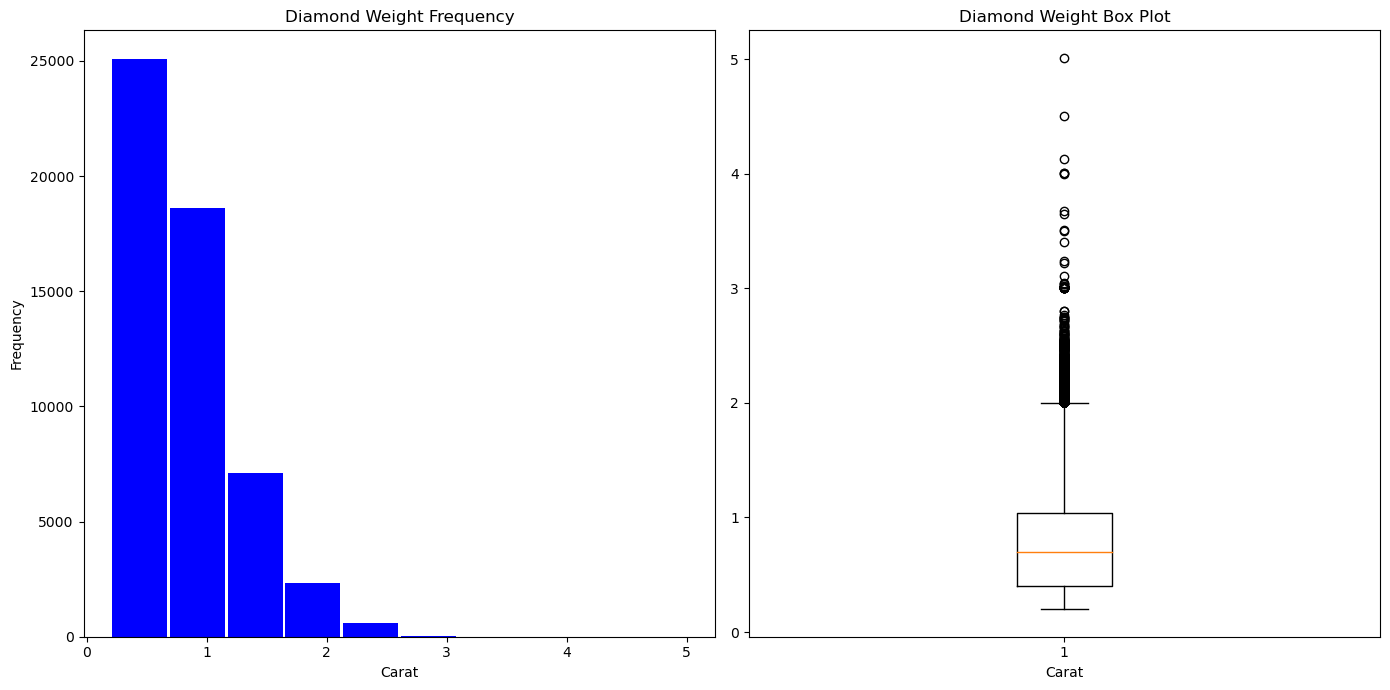

In [103]:
fig, ax = plt.subplots( ncols=2, figsize=(14, 7))

ax[0].hist(df['carat'], rwidth=0.95, color='blue')
ax[0].set_xlabel('Carat')
ax[0].set_ylabel('Frequency')
ax[0].set_title('Diamond Weight Frequency')

ax[1].boxplot(df['carat'])
ax[1].set_xlabel('Carat')
ax[1].set_title('Diamond Weight Box Plot')

plt.tight_layout()
plt.show()

## Univariate Analysis: Dept

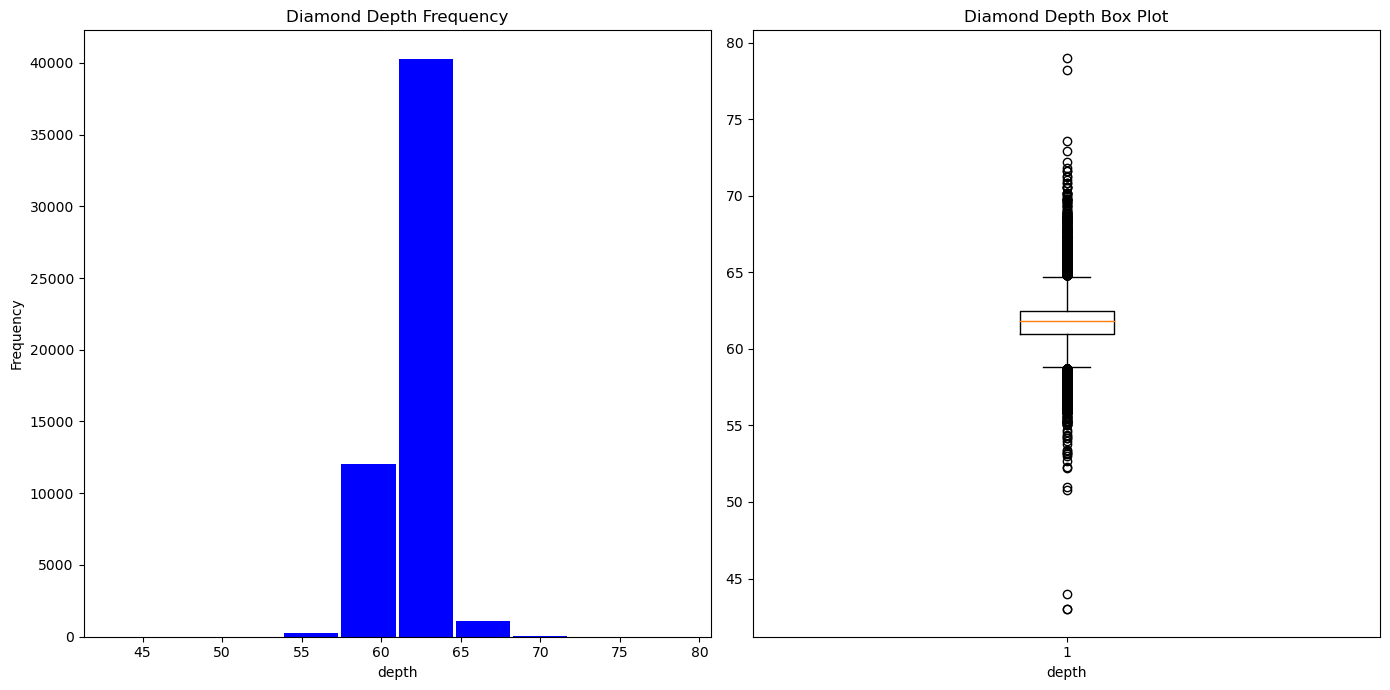

In [104]:
fig, ax = plt.subplots( ncols=2, figsize=(14, 7))

ax[0].hist(df['depth'], rwidth=0.95, color='blue')
ax[0].set_xlabel('depth')
ax[0].set_ylabel('Frequency')
ax[0].set_title('Diamond Depth Frequency')

ax[1].boxplot(df['depth'])
ax[1].set_xlabel('depth')
ax[1].set_title('Diamond Depth Box Plot')

plt.tight_layout()
plt.show()

## Univariate Analysis: Table

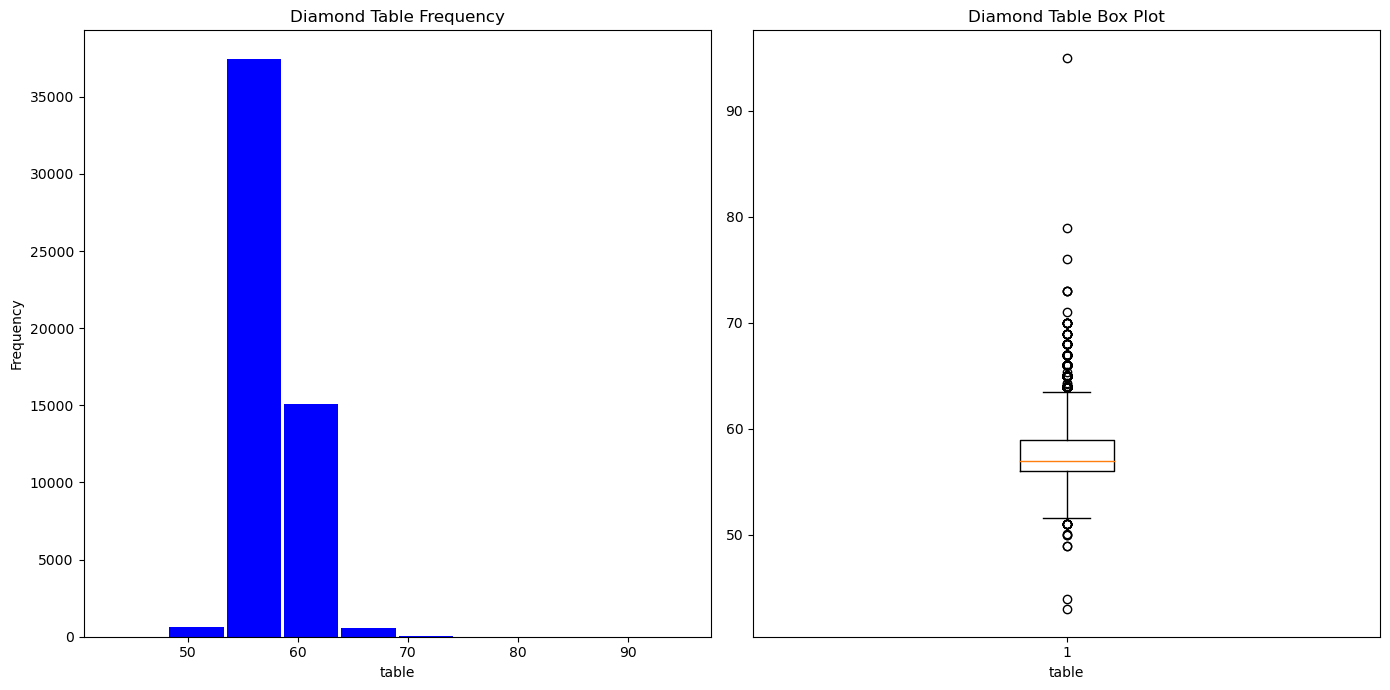

In [105]:
fig, ax = plt.subplots( ncols=2, figsize=(14, 7))

ax[0].hist(df['table'], rwidth=0.95, color='blue')
ax[0].set_xlabel('table')
ax[0].set_ylabel('Frequency')
ax[0].set_title('Diamond Table Frequency')

ax[1].boxplot(df['table'])
ax[1].set_xlabel('table')
ax[1].set_title('Diamond Table Box Plot')

plt.tight_layout()
plt.show()

## Univariate Analysis: Price

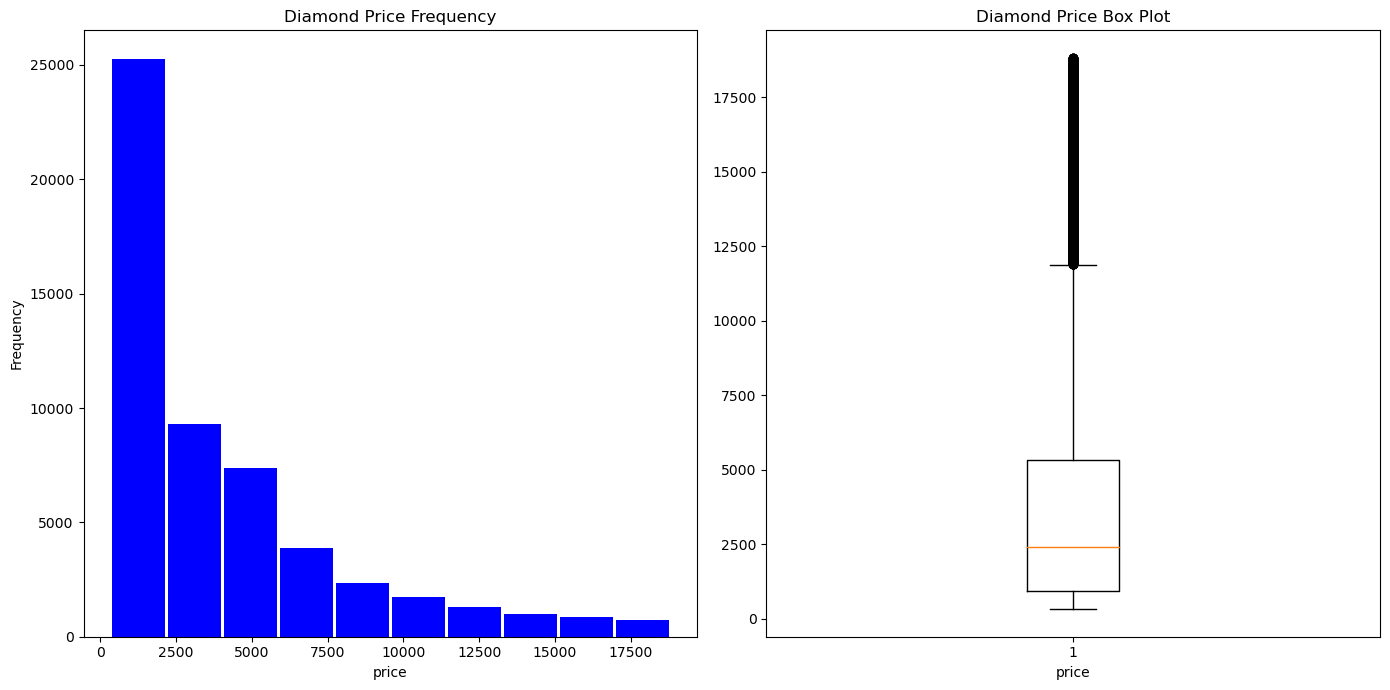

In [106]:
fig, ax = plt.subplots( ncols=2, figsize=(14, 7))

ax[0].hist(df['price'], rwidth=0.95, color='blue')
ax[0].set_xlabel('price')
ax[0].set_ylabel('Frequency')
ax[0].set_title('Diamond Price Frequency')

ax[1].boxplot(df['price'])
ax[1].set_xlabel('price')
ax[1].set_title('Diamond Price Box Plot')

plt.tight_layout()
plt.show()

## Bivariate Analysis

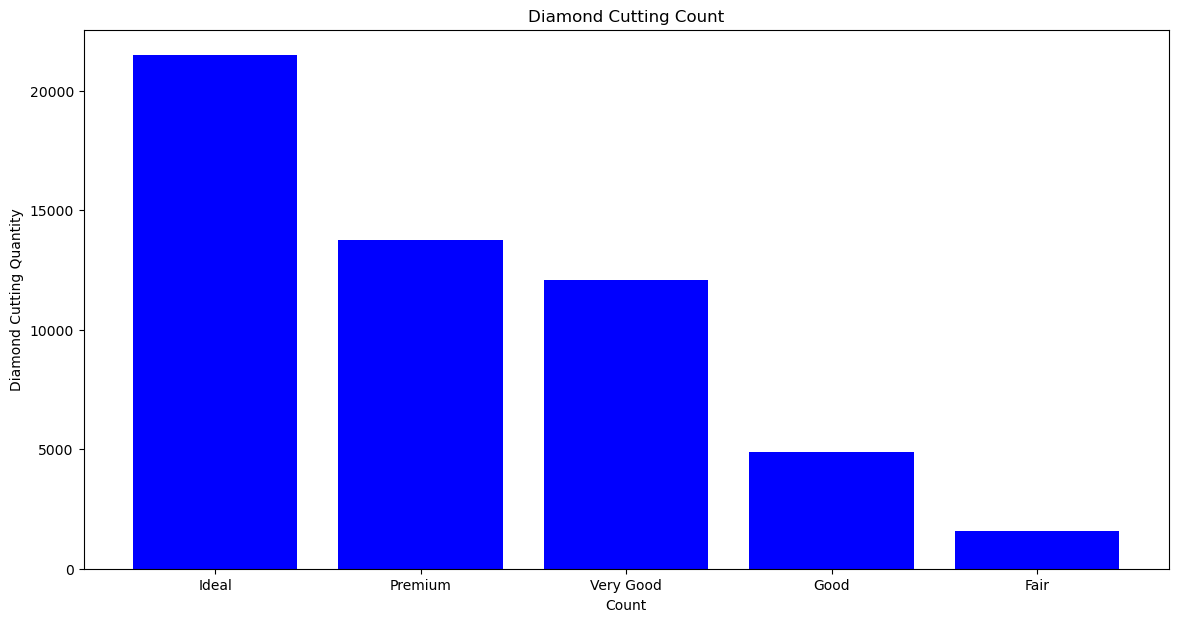

In [107]:
cut = df['cut'].value_counts()
fig, ax = plt.subplots(figsize=(14, 7))

ax.bar(cut.index, cut ,color='blue')
ax.set_xlabel('Count')
ax.set_ylabel('Diamond Cutting Quantity')
ax.set_title('Diamond Cutting Count')
plt.show()

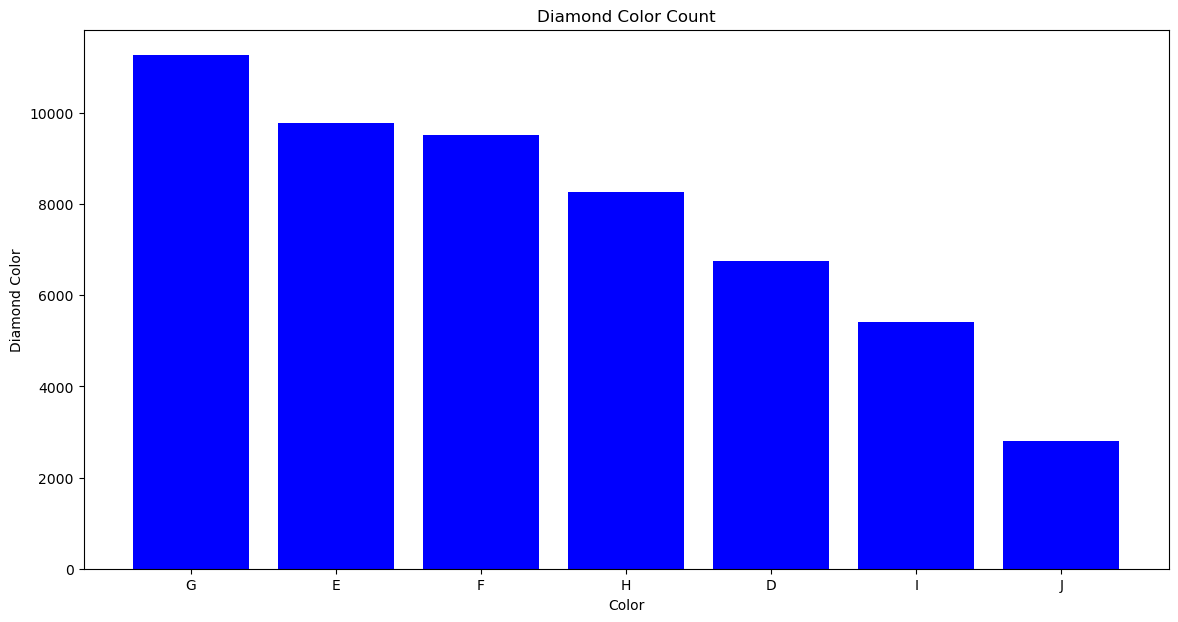

In [108]:
color = df['color'].value_counts()
fig, ax = plt.subplots(figsize=(14, 7))

ax.bar(color.index, color ,color='blue')
ax.set_xlabel('Color')
ax.set_ylabel('Diamond Color')
ax.set_title('Diamond Color Count')
plt.show()

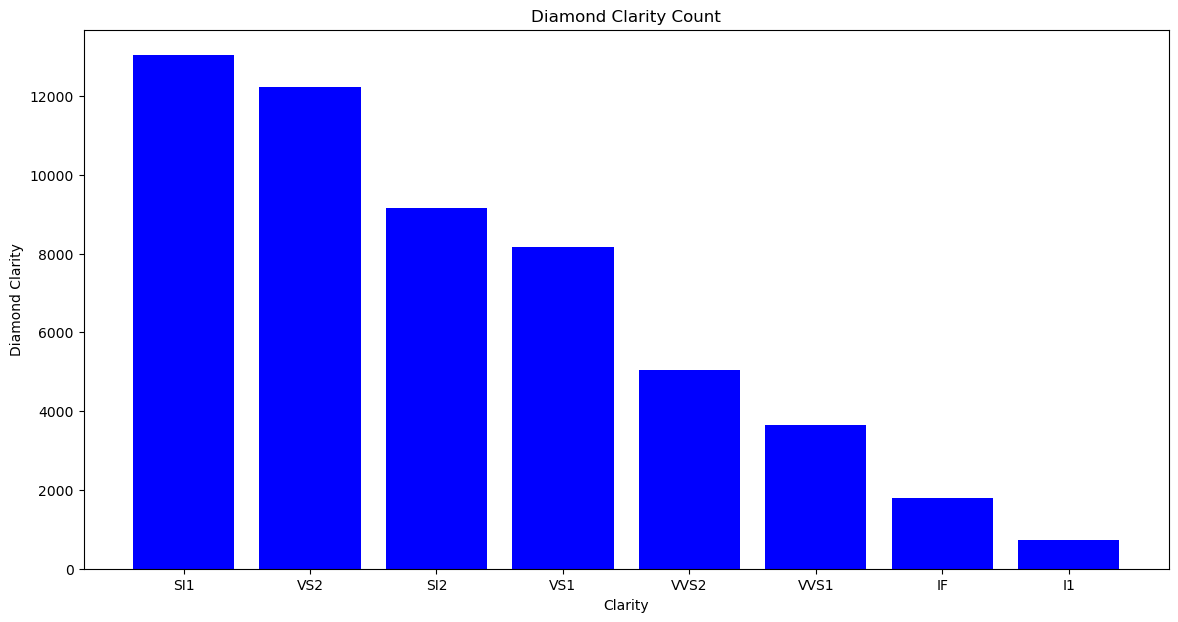

In [109]:
clarity = df['clarity'].value_counts()
fig, ax = plt.subplots(figsize=(14, 7))

ax.bar(clarity.index, clarity ,color='blue')
ax.set_xlabel('Clarity')
ax.set_ylabel('Diamond Clarity')
ax.set_title('Diamond Clarity Count')
plt.show()

## Correllation: Carat VS Price

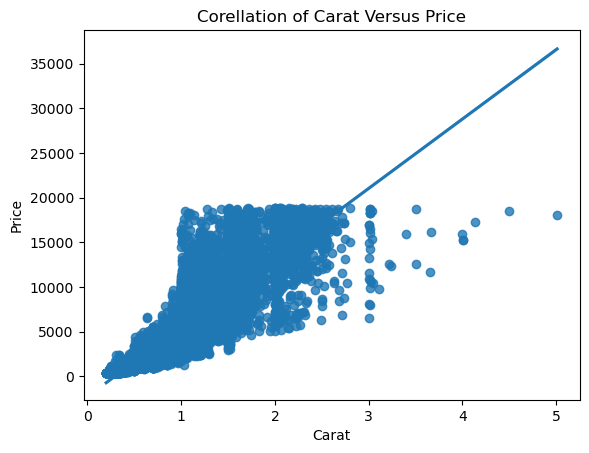

In [110]:
sns.regplot(data=df, x=df['carat'], y=df['price'])
plt.xlabel("Carat")
plt.ylabel("Price")
plt.title("Corellation of Carat Versus Price")
plt.show()

## Other Features

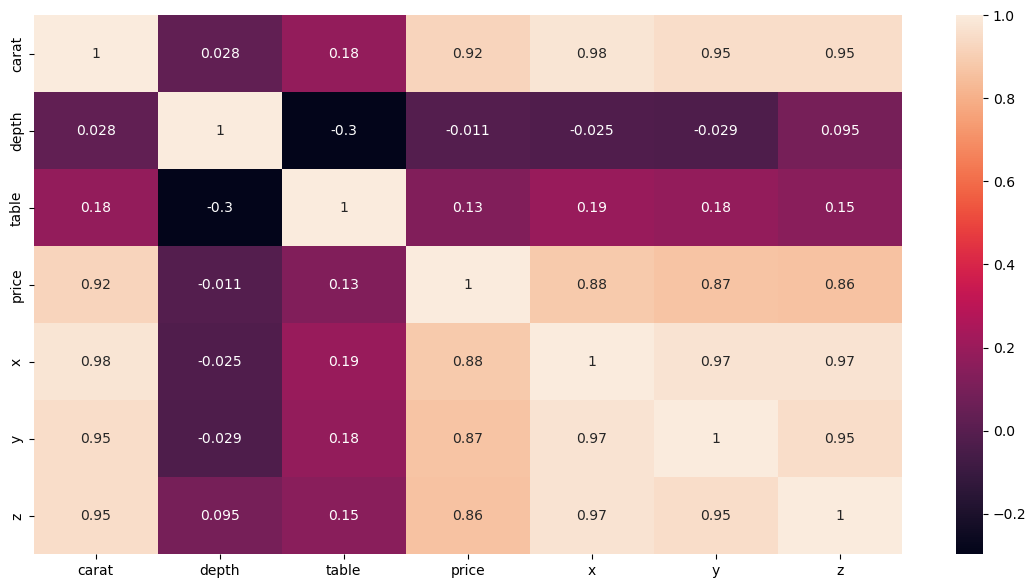

In [111]:
fig, ax = plt.subplots(figsize=(14, 7))
sns.heatmap(data=df.corr(numeric_only=True), annot=True)
plt.show()

In [112]:
df.corr(numeric_only=True)['price']

carat    0.921548
depth   -0.011048
table    0.126566
price    1.000000
x        0.884504
y        0.865395
z        0.861208
Name: price, dtype: float64

## Building Machine Learning Model

## Data Split

* X -> Independent Features
* y -> Dependent Features

In [113]:
X = df.drop(columns=['price'])

y = df['price']

## Perform Label Encoder on "cut" and "color"

In [114]:
cut_dummy = pd.get_dummies(X['cut'])

In [115]:
color_dummy = pd.get_dummies(X['color'])

In [116]:
clarity_dummy = pd.get_dummies(X['clarity'])

In [117]:
# concatenate the dummy with the X 

X = pd.concat([X, cut_dummy, color_dummy, clarity_dummy], axis=1)
X

,carat,cut,color,clarity,depth,table,x,y,z,Fair,...,I,J,I1,IF,SI1,SI2,VS1,VS2,VVS1,VVS2
0,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43,False,...,False,False,False,False,False,True,False,False,False,False
1,0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,2.31,False,...,False,False,False,False,True,False,False,False,False,False
2,0.23,Good,E,VS1,56.9,65.0,4.05,4.07,2.31,False,...,False,False,False,False,False,False,True,False,False,False
3,0.29,Premium,I,VS2,62.4,58.0,4.20,4.23,2.63,False,...,True,False,False,False,False,False,False,True,False,False
4,0.31,Good,J,SI2,63.3,58.0,4.34,4.35,2.75,False,...,False,True,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,5.75,5.76,3.50,False,...,False,False,False,False,True,False,False,False,False,False
53936,0.72,Good,D,SI1,63.1,55.0,5.69,5.75,3.61,False,...,False,False,False,False,True,False,False,False,False,False
53937,0.70,Very Good,D,SI1,62.8,60.0,5.66,5.68,3.56,False,...,False,False,False,False,True,False,False,False,False,False
53938,0.86,Premium,H,SI2,61.0,58.0,6.15,6.12,3.74,False,...,False,False,False,False,False,True,False,False,False,False


In [118]:
# remove columns: cut, color, clarity
X.drop(columns=['cut', 'color', 'clarity'], inplace=True)

In [119]:
X.shape

(53794, 26)

In [120]:
y.shape

(53794,)

## Train Test Split

In [121]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## Linear Regression

In [122]:
lreg_model = LinearRegression()

In [123]:
lreg_model.fit(X_train, y_train)

LinearRegression()

In [124]:
lreg_model.intercept_

6195.601750128382

In [125]:
lreg_model.coef_

array([ 1.12948707e+04, -6.71475061e+01, -2.96453114e+01, -1.02626417e+03,
        1.25727016e+01, -4.83167816e+01, -5.61946814e+02, -3.70142023e+00,
        2.47113011e+02,  1.81070814e+02,  1.37464409e+02,  8.15252404e+02,
        6.22570753e+02,  5.44972710e+02,  3.47187478e+02, -1.50311155e+02,
       -6.36959101e+02, -1.54271309e+03, -3.83618757e+03,  1.51320838e+03,
       -1.45159567e+02, -1.08862808e+03,  7.61366458e+02,  4.57585622e+02,
        1.19878991e+03,  1.13902485e+03])

In [126]:
# make prediction using the X_test
lreg_pred = lreg_model.predict(X_test)
lreg_pred

array([-311.96952893, 6100.11736032, 1957.80098957, ..., 4765.43412122,
       3928.20340451, 2040.01505918])

In [127]:
# actual value
y_test = np.array(y_test)
y_test

array([ 432, 6964, 2037, ..., 3911, 3066, 1611])

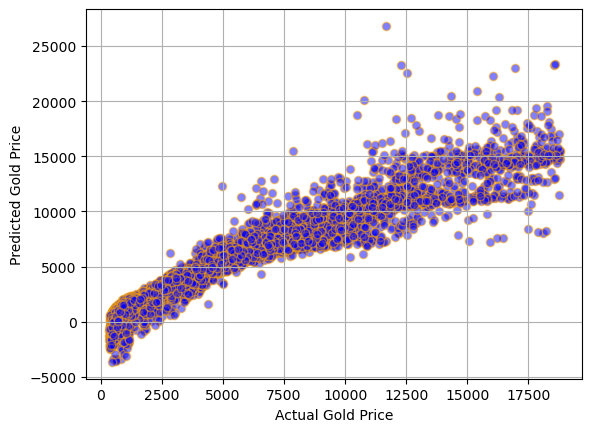

In [128]:
plt.scatter(y_test, lreg_pred, edgecolors='orange', alpha=0.5, color='blue')
plt.xlabel("Actual Gold Price")
plt.ylabel("Predicted Gold Price")
plt.grid()
plt.show()

In [129]:
rmse = mean_squared_error(y_test, lreg_pred)
r2 = r2_score(y_test, lreg_pred)

N = X_test.shape[0]
P = X_test.shape[1]
r2_adjusted = 1 - ((1 - r2) * (N - 1)) / (N - P - 1)

print(f"RMSE : {rmse:.3f}")
print(f"R2 : {r2:.3f}")
print(f"R2_adjusted : {r2_adjusted:.3f}")

RMSE : 1280220.409
R2 : 0.920
R2_adjusted : 0.920


## Ridge

In [130]:
ridge_model = Ridge(alpha=.5)

ridge_model.fit(X_train, y_train)

Ridge(alpha=0.5)

In [131]:
# make prediction using the X_test
ridge_pred = ridge_model.predict(X_test)
ridge_pred

array([-313.35829967, 6100.97936762, 1959.97657363, ..., 4766.08437379,
       3929.08311849, 2040.41452807])

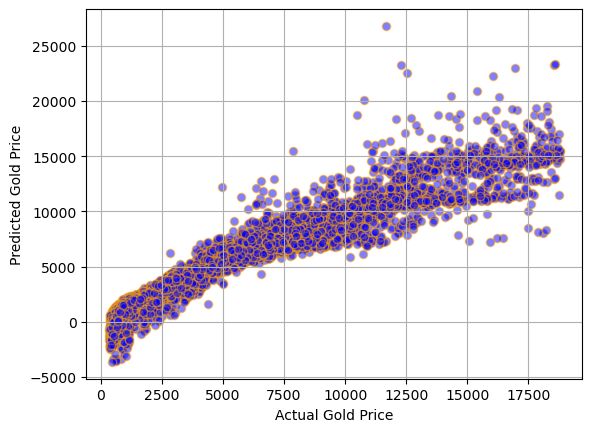

In [132]:
plt.scatter(y_test, ridge_pred, edgecolors='orange', alpha=0.5, color='blue')
plt.xlabel("Actual Gold Price")
plt.ylabel("Predicted Gold Price")
plt.grid()
plt.show()

In [133]:
rmse = mean_squared_error(y_test, ridge_pred)
r2 = r2_score(y_test, ridge_pred)

N = X_test.shape[0]
P = X_test.shape[1]
r2_adjusted = 1 - ((1 - r2) * (N - 1)) / (N - P - 1)

print(f"RMSE : {rmse:.3f}")
print(f"R2 : {r2:.3f}")
print(f"R2_adjusted : {r2_adjusted:.3f}")

RMSE : 1280258.594
R2 : 0.920
R2_adjusted : 0.920


## Lasso

In [134]:
lasso_model = Lasso(alpha=.5)

lasso_model.fit(X_train, y_train)

Lasso(alpha=0.5)

In [135]:
# make prediction using the X_test
lasso_pred = lasso_model.predict(X_test)
lasso_pred

array([-319.78516482, 6104.98972865, 1973.85129156, ..., 4762.394117  ,
       3924.40803403, 2040.18408277])

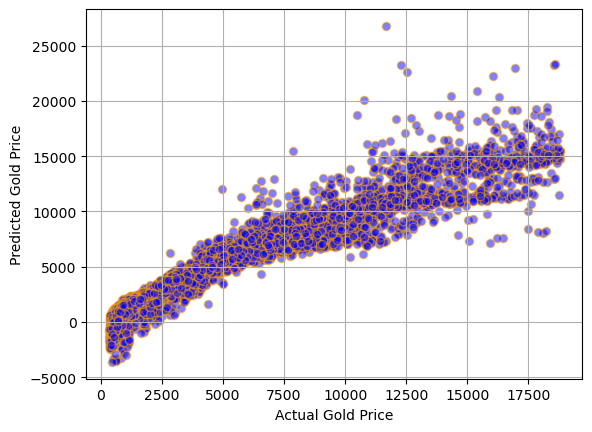

In [136]:
plt.scatter(y_test, lasso_pred, edgecolors='orange', alpha=0.5, color='blue')
plt.xlabel("Actual Gold Price")
plt.ylabel("Predicted Gold Price")
plt.grid()
plt.show()

In [137]:
rmse = mean_squared_error(y_test, lasso_pred)
r2 = r2_score(y_test, lasso_pred)

N = X_test.shape[0]
P = X_test.shape[1]
r2_adjusted = 1 - ((1 - r2) * (N - 1)) / (N - P - 1)

print(f"RMSE : {rmse:.3f}")
print(f"R2 : {r2:.3f}")
print(f"R2_adjusted : {r2_adjusted:.3f}")

RMSE : 1280751.864
R2 : 0.920
R2_adjusted : 0.920


## Save Model

In [146]:
import pickle

# save the diamond Linear Regression model as a pickle file
with open('diamond_linear_model.pickle', 'wb') as file:
    pickle.dump(lreg_model, file)

In [147]:
X_test.columns

Index(['carat', 'depth', 'table', 'x', 'y', 'z', 'Fair', 'Good', 'Ideal',
       'Premium', 'Very Good', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'I1', 'IF',
       'SI1', 'SI2', 'VS1', 'VS2', 'VVS1', 'VVS2'],
      dtype='object')